In [7]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [73]:
import sqlite3
import csv
from pathlib import Path

BASEDIR = Path().cwd().parent
filename = "orders.csv"

query = """
    SELECT o.id as order_id, o.datetime, p.name, p.price, oi.quantity
    FROM restaurant_order o
    JOIN restaurant_orderitem oi ON o.id = oi.order_id
    JOIN restaurant_product p ON oi.product_id = p.id
"""

conn = sqlite3.connect(BASEDIR / "db.sqlite3")
cur = conn.cursor()

cur.execute(query)
rows = cur.fetchall()

with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    writer.writerow(["Order ID", "Date", "Product", "Price", "Quantity"])
    
    writer.writerows(rows)
    

conn.close()

df = pd.read_csv(filename)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

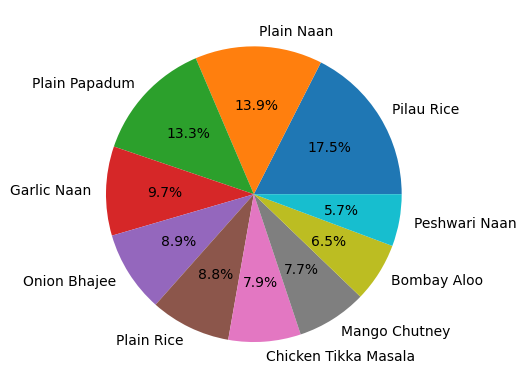

In [60]:
import matplotlib.pyplot as plt


products_df = df["Product"].value_counts().reset_index()[:10]
products_df.columns = ["Product", "Count"]

total_count = products_df["Count"].sum()
products_df["Percentage"] = ((products_df["Count"] / total_count) * 100).round(2)

plt.pie(products_df["Percentage"],  labels=products_df["Product"], autopct='%1.1f%%')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

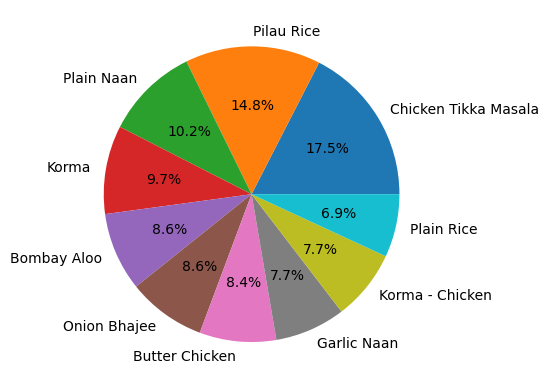

In [83]:
df["Item Price"] = df["Price"] * df["Quantity"]


grouped = df.groupby("Product")["Item Price"].sum().reset_index()
top_10 = grouped.sort_values("Item Price", ascending=False).head(10)

plt.pie(top_10["Item Price"], labels=top_10["Product"], autopct='%1.1f%%')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

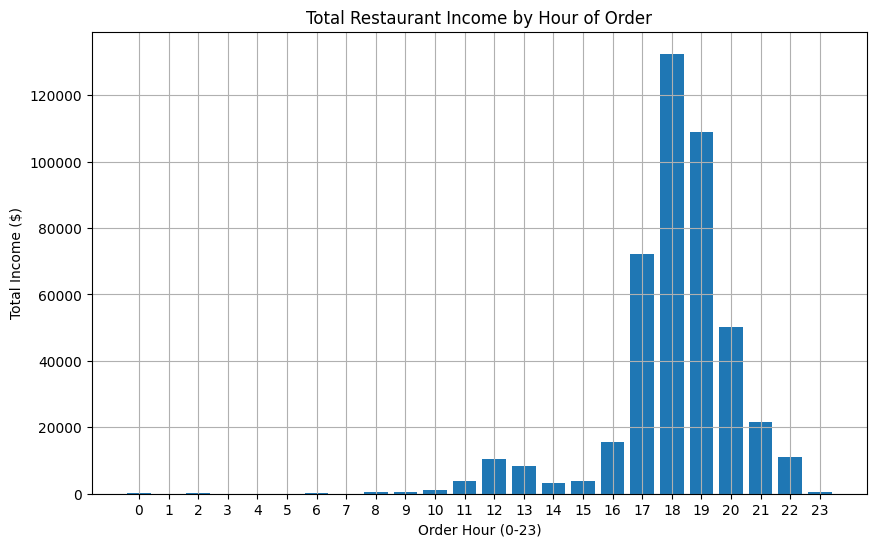

In [93]:
df["Order Hour"] = pd.to_datetime(df["Date"]).dt.hour
income_by_hour = df.groupby("Order Hour")["Item Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(income_by_hour["Order Hour"], income_by_hour["Item Price"])

plt.xlabel("Order Hour (0-23)")
plt.ylabel("Total Income ($)")
plt.title('Total Restaurant Income by Hour of Order')

plt.xticks(range(24))
plt.grid()
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

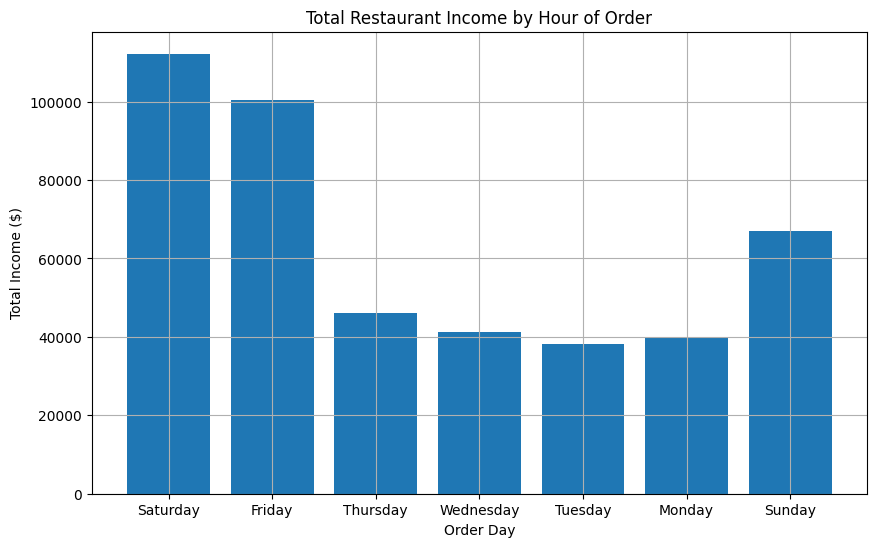

In [105]:
df["Order Day"]  = pd.to_datetime(df["Date"]).dt.day_name()
income_by_day = df.groupby("Order Day")["Item Price"].sum().reset_index()

day_order = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

income_by_day["Order Day Sort"] = income_by_day["Order Day"].map(day_order)

income_by_day = income_by_day.sort_values("Order Day Sort", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(income_by_day["Order Day"], income_by_day["Item Price"])

plt.xlabel("Order Day")
plt.ylabel("Total Income ($)")
plt.title('Total Restaurant Income by Hour of Order')

plt.grid()
plt.show()